In [75]:
%run ./ml_model_init.ipynb

## Baseline Model


In [76]:
# Split the gk data into train and test sets
gk_splits = split_data(gk_player_data)

#### Linear Model


In [77]:

base_gk_lin_reg = Linear_regression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])
print(base_gk_lin_reg)
# Store the model evaluation details in a DataFrame
gk_evaluation_stats = pd.DataFrame({"base_gk_lin_reg": [base_gk_lin_reg['train_MAE'], base_gk_lin_reg['test_MAE'], base_gk_lin_reg['train_RMSE'], base_gk_lin_reg['test_RMSE'], base_gk_lin_reg['cv_rmse'], base_gk_lin_reg['R2_train'], base_gk_lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

gk_evaluation_stats

Training set RMSE: 0.8057899621203156
Test set RMSE: 0.9872763889249403
Training set R2: 0.8727184722659453
Test set R2: 0.849089476928709
{'train_MAE': 0.5379484423528549, 'test_MAE': 0.6230073452662847, 'train_MSE': 0.6492974630538597, 'test_MSE': 0.9747146681286699, 'train_RMSE': 0.8057899621203156, 'test_RMSE': 0.9872763889249403, 'cv_rmse': 0.8135005812927603, 'R2_train': 0.8727184722659453, 'R2_test': 0.849089476928709}


,base_gk_lin_reg
train_MAE,0.537948
test_MAE,0.623007
train_RMSE,0.805790
test_RMSE,0.987276
cv_rmse,0.813501
R2_train,0.872718
R2_test,0.849089


#### DecisionTree Model


In [78]:
base_gk_dt_reg = DecisionTreeRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_dt_reg = [base_gk_dt_reg['train_MAE'], base_gk_dt_reg['test_MAE'], base_gk_dt_reg['train_RMSE'], base_gk_dt_reg['test_RMSE'], base_gk_dt_reg['cv_rmse'], base_gk_dt_reg['R2_train'], base_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg
train_MAE,0.537948,1.215244e-16
test_MAE,0.623007,6.846847e-01
train_RMSE,0.805790,3.150776e-16
test_RMSE,0.987276,1.287501e+00
cv_rmse,0.813501,1.110937e+00
R2_train,0.872718,1.000000e+00
R2_test,0.849089,7.433526e-01


#### RandomForest Model


In [79]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_gk_rf_reg = RandomForestRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_rf_reg = [base_gk_rf_reg['train_MAE'], base_gk_rf_reg['test_MAE'], base_gk_rf_reg['train_RMSE'], base_gk_rf_reg['test_RMSE'], base_gk_rf_reg['cv_rmse'], base_gk_rf_reg['R2_train'], base_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg
train_MAE,0.537948,1.215244e-16,0.343052
test_MAE,0.623007,6.846847e-01,0.573287
train_RMSE,0.805790,3.150776e-16,0.498670
test_RMSE,0.987276,1.287501e+00,0.902022
cv_rmse,0.813501,1.110937e+00,0.801554
R2_train,0.872718,1.000000e+00,0.951253
R2_test,0.849089,7.433526e-01,0.874027


#### XgBoost Model


In [80]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_gk_xgb_reg = XGBoostRegression(gk_splits['feature_train'], gk_splits['features_test'], gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_xgb_reg = [base_gk_xgb_reg['train_MAE'], base_gk_xgb_reg['test_MAE'], base_gk_xgb_reg['train_RMSE'], base_gk_xgb_reg['test_RMSE'], base_gk_xgb_reg['cv_rmse'], base_gk_xgb_reg['R2_train'], base_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298
test_MAE,0.623007,6.846847e-01,0.573287,0.622029
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302
R2_train,0.872718,1.000000e+00,0.951253,0.913450
R2_test,0.849089,7.433526e-01,0.874027,0.856684


# Feature engineering


## Goalkeepers


### VarianceThreshold


In [81]:
VT_scaler = StandardScaler()
VT_scaler.fit(gk_splits['feature_train'])
df_gk_train_scaled = pd.DataFrame(VT_scaler.fit_transform(gk_splits['feature_train']), columns=gk_splits['feature_train'].columns)
df_gk_test_scaled = pd.DataFrame(VT_scaler.transform(gk_splits['features_test']), columns=gk_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_gk_train_scaled)

gk_threshold_columns = df_gk_train_scaled.columns[selector.get_support()]

gk_threshold_train = df_gk_train_scaled[gk_threshold_columns]
gk_threshold_test = df_gk_test_scaled[gk_threshold_columns]

gk_threshold_train.shape, gk_threshold_test.shape

((888, 15), (222, 15))

#### Model(VT)


##### Linear Model


In [82]:

VarT_gk_lin_reg = Linear_regression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_lin_reg =  [VarT_gk_lin_reg['train_MAE'], VarT_gk_lin_reg['test_MAE'], VarT_gk_lin_reg['train_RMSE'], VarT_gk_lin_reg['test_RMSE'], VarT_gk_lin_reg['cv_rmse'], VarT_gk_lin_reg['R2_train'], VarT_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.8057899621203156
Test set RMSE: 0.987276388924942
Training set R2: 0.8727184722659453
Test set R2: 0.8490894769287085


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089


##### DecisionTree Model


In [83]:
VarT_gk_dt_reg = DecisionTreeRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_dt_reg = [VarT_gk_dt_reg['train_MAE'], VarT_gk_dt_reg['test_MAE'], VarT_gk_dt_reg['train_RMSE'], VarT_gk_dt_reg['test_RMSE'], VarT_gk_dt_reg['cv_rmse'], VarT_gk_dt_reg['R2_train'], VarT_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01


##### RandomForest Model


In [84]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_gk_rf_reg = RandomForestRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_rf_reg = [VarT_gk_rf_reg['train_MAE'], VarT_gk_rf_reg['test_MAE'], VarT_gk_rf_reg['train_RMSE'], VarT_gk_rf_reg['test_RMSE'], VarT_gk_rf_reg['cv_rmse'], VarT_gk_rf_reg['R2_train'], VarT_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176


##### XgBoost Model


In [85]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_gk_xgb_reg = XGBoostRegression(gk_threshold_train, gk_threshold_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_xgb_reg = [VarT_gk_xgb_reg['train_MAE'], VarT_gk_xgb_reg['test_MAE'], VarT_gk_xgb_reg['train_RMSE'], VarT_gk_xgb_reg['test_RMSE'], VarT_gk_xgb_reg['cv_rmse'], VarT_gk_xgb_reg['R2_train'], VarT_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684


### Feature selection techniques


#### K-best features


In [86]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, gk_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, gk_splits['target_train'])

  k_sel_cols = gk_threshold_train.columns[selector.get_support()]
  k_sel_X_test = gk_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, gk_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.729, 0.819, 0.846, 0.85, 0.839, 0.835, 0.837, 0.819, 0.838, 0.833, 0.822, 0.82, 0.824, 0.818, 0.797] 3


In [87]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = gk_threshold_train[sel_feats]
k_sel_X_test = gk_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [88]:

KBest_gk_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_lin_reg =  [KBest_gk_lin_reg['train_MAE'], KBest_gk_lin_reg['test_MAE'], KBest_gk_lin_reg['train_RMSE'], KBest_gk_lin_reg['test_RMSE'], KBest_gk_lin_reg['cv_rmse'], KBest_gk_lin_reg['R2_train'], KBest_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.831086278059089
Test set RMSE: 0.9697423603376396
Training set R2: 0.8646014863018104
Test set R2: 0.8544022188491749


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402


###### DecisionTree Model


In [89]:
KBest_gk_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_dt_reg = [KBest_gk_dt_reg['train_MAE'], KBest_gk_dt_reg['test_MAE'], KBest_gk_dt_reg['train_RMSE'], KBest_gk_dt_reg['test_RMSE'], KBest_gk_dt_reg['cv_rmse'], KBest_gk_dt_reg['R2_train'], KBest_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01


###### RandomForest Model


In [90]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_gk_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_rf_reg = [KBest_gk_rf_reg['train_MAE'], KBest_gk_rf_reg['test_MAE'], KBest_gk_rf_reg['train_RMSE'], KBest_gk_rf_reg['test_RMSE'], KBest_gk_rf_reg['cv_rmse'], KBest_gk_rf_reg['R2_train'], KBest_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552


###### XgBoost Model


In [91]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_xgb_reg = [KBest_gk_xgb_reg['train_MAE'], KBest_gk_xgb_reg['test_MAE'], KBest_gk_xgb_reg['train_RMSE'], KBest_gk_xgb_reg['test_RMSE'], KBest_gk_xgb_reg['cv_rmse'], KBest_gk_xgb_reg['R2_train'], KBest_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735


#### Mutual Information


In [92]:
from sklearn.feature_selection import mutual_info_regression
# gk_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, gk_splits['target_train'])
mutual_info

array([0.15099949, 0.47684776, 0.32837159, 0.1304504 ])

In [93]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

clean_sheets               0.476848
ict_index                  0.328372
expected_goals_conceded    0.150999
xP                         0.130450
dtype: float64

<Axes: >

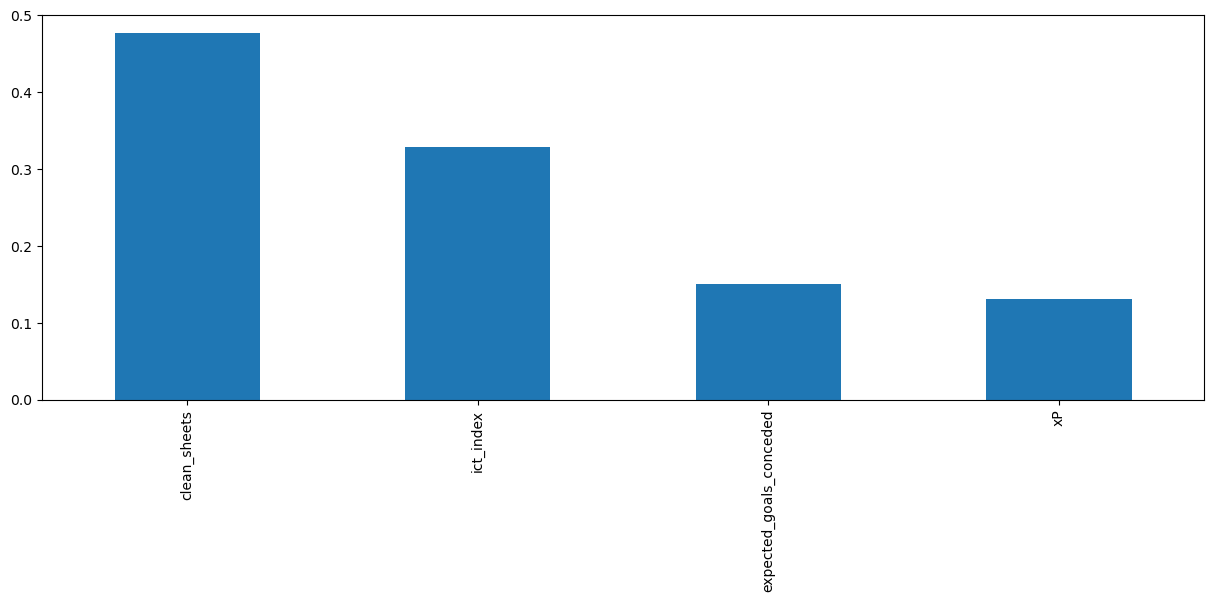

In [94]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [95]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, gk_splits['target_train'])

selected_top_columns.get_support()

array([False,  True,  True, False])

In [96]:
gk_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

gk_20_train = k_sel_X_train[gk_20_columns]
gk_20_test = k_sel_X_test[gk_20_columns]


In [97]:
gk_20_train.shape, gk_20_test.shape

((888, 2), (222, 2))

##### Model (MI)


###### Linear Model


In [98]:

MI_gk_lin_reg = Linear_regression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_lin_reg =  [MI_gk_lin_reg['train_MAE'], MI_gk_lin_reg['test_MAE'], MI_gk_lin_reg['train_RMSE'], MI_gk_lin_reg['test_RMSE'], MI_gk_lin_reg['cv_rmse'], MI_gk_lin_reg['R2_train'], MI_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 0.8671957768658958
Test set RMSE: 1.0329165982250608
Training set R2: 0.8525801442511832
Test set R2: 0.8348142668131528


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814


###### DecisionTree Model


In [99]:
MI_gk_dt_reg = DecisionTreeRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_dt_reg = [MI_gk_dt_reg['train_MAE'], MI_gk_dt_reg['test_MAE'], MI_gk_dt_reg['train_RMSE'], MI_gk_dt_reg['test_RMSE'], MI_gk_dt_reg['cv_rmse'], MI_gk_dt_reg['R2_train'], MI_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209


###### RandomForest Model


In [100]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_gk_rf_reg = RandomForestRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_rf_reg = [MI_gk_rf_reg['train_MAE'], MI_gk_rf_reg['test_MAE'], MI_gk_rf_reg['train_RMSE'], MI_gk_rf_reg['test_RMSE'], MI_gk_rf_reg['cv_rmse'], MI_gk_rf_reg['R2_train'], MI_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444


###### XgBoost Model


In [101]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_xgb_reg = [MI_gk_xgb_reg['train_MAE'], MI_gk_xgb_reg['test_MAE'], MI_gk_xgb_reg['train_RMSE'], MI_gk_xgb_reg['test_RMSE'], MI_gk_xgb_reg['cv_rmse'], MI_gk_xgb_reg['R2_train'], MI_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959,0.499635
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447,0.649413
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205,0.690470
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904,0.991697
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781,0.822544
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379,0.906543
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444,0.847735


# Best Stats


In [102]:
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959,0.499635
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447,0.649413
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205,0.690470
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904,0.991697
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781,0.822544
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379,0.906543
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444,0.847735


In [103]:
# - BASE:  rf


## Fine tuning the models


In [104]:
model = RandomForestRegressor()

param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [18]
}

In [105]:
gk_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error').fit(
    gk_threshold_train, gk_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

In [106]:
print("The best midfielder hyperparameters are ", gk_search.best_params_)

The best midfielder hyperparameters are  {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}
